In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import requests
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [7]:
ret = requests.get('https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1405699200&end=9999999999&period=86400')

In [8]:
ret

<Response [200]>

In [17]:
ret.text

'[{"date":1424304000,"high":244,"low":225,"open":225,"close":244,"volume":46.27631267,"quoteVolume":0.19311748,"weightedAverage":239.62777823},{"date":1424390400,"high":245,"low":240.25,"open":240.25011809,"close":240.25,"volume":55.894897,"quoteVolume":0.23042935,"weightedAverage":242.56847926},{"date":1424476800,"high":245,"low":245,"open":245,"close":245,"volume":14.72223865,"quoteVolume":0.06009077,"weightedAverage":245},{"date":1424563200,"high":249,"low":235,"open":245,"close":235,"volume":129.12124785,"quoteVolume":0.53905499,"weightedAverage":239.53260845},{"date":1424649600,"high":235.001,"low":235,"open":235.00000236,"close":235,"volume":96.56756248,"quoteVolume":0.41092569,"weightedAverage":235.00006166},{"date":1424736000,"high":239.75,"low":235,"open":235,"close":239.75,"volume":149.15439319,"quoteVolume":0.6267487,"weightedAverage":237.98117682},{"date":1424822400,"high":239.75,"low":237.75,"open":239.75,"close":237.75,"volume":221.58409525,"quoteVolume":0.92755033,"weigh

In [18]:
df = pd.DataFrame(ret.json())
df.head()                                                                                                                                                                                                                                                                                                                                                                                                                                                 

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000,225.00,225.000000,244.00,46.276313,0.193117,239.627778
1,1424390400,245.000,240.25,240.250118,240.25,55.894897,0.230429,242.568479
2,1424476800,245.000,245.00,245.000000,245.00,14.722239,0.060091,245.000000
3,1424563200,249.000,235.00,245.000000,235.00,129.121248,0.539055,239.532608
4,1424649600,235.001,235.00,235.000002,235.00,96.567562,0.410926,235.000062


In [21]:
scaler = MinMaxScaler()
price = scaler.fit_transform(df)[:, 4]

In [22]:
price = list(price)

In [24]:
len(price)

2589

In [29]:
window_size=10
X = []
Y = []

for i in range(len(price) - window_size):
  X.append([price[i+j] for j in range(window_size)])
  Y.append(price[window_size + i])

In [30]:
X = np.array(X)
Y = np.array(Y)

In [31]:
X.shape

(2579, 10)

In [32]:
Y.shape

(2579,)

In [33]:
train_test_split = 2000

x_train = X[:2000]
y_train = Y[:2000]

x_test = X[2000:]
y_test = Y[2000:]

In [34]:
x_train.shape

(2000, 10)

In [36]:
x_test.shape

(579, 10)

In [ ]:
# 3차원입력 : (n_sample, time_steps, n_features)

x_train = np.reshape(x_train, (2000, 10, 1))
x_test = np.reshape(x_test, (579, 10, 1))


In [37]:
x_train.shape

(2000, 10)

In [39]:
model = Sequential()
model.add(LSTM(100, input_shape = (10, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='mse', optimizer='adam')

In [43]:
model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/20
200/200 [==============================] - 7s 18ms/step - loss: 3.1715e-04 - val_loss: 0.0021
Epoch 2/20
200/200 [==============================] - 3s 13ms/step - loss: 1.0453e-04 - val_loss: 0.0020
Epoch 3/20
200/200 [==============================] - 3s 13ms/step - loss: 8.7641e-05 - val_loss: 0.0018
Epoch 4/20
200/200 [==============================] - 2s 12ms/step - loss: 9.7872e-05 - val_loss: 0.0043
Epoch 5/20
200/200 [==============================] - 3s 13ms/step - loss: 7.9718e-05 - val_loss: 0.0012
Epoch 6/20
200/200 [==============================] - 2s 12ms/step - loss: 7.7008e-05 - val_loss: 0.0031
Epoch 7/20
200/200 [==============================] - 2s 9ms/step - loss: 6.0570e-05 - val_loss: 0.0014
Epoch 8/20
200/200 [==============================] - 2s 9ms/step - loss: 6.2940e-05 - val_loss: 0.0011
Epoch 9/20
200/200 [==============================] - 2s 9ms/step - loss: 6.0729e-05 - val_loss: 0.0048
Epoch 10/20
200/200 [==============================] - 2s 

In [44]:
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test)

In [74]:
len(x_train_pred)

2000

In [73]:
len(x_test_pred)

579

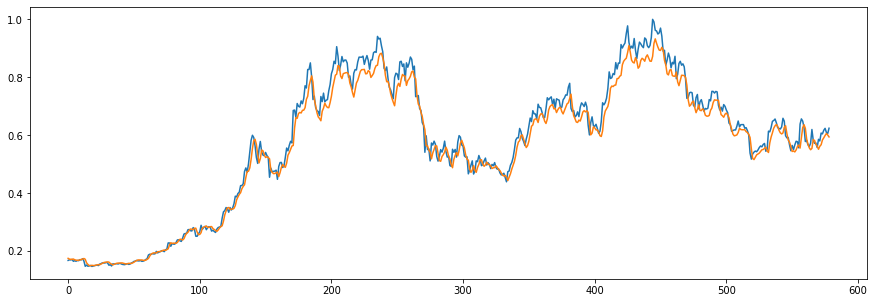

In [79]:
plt.figure(figsize=(15,5))

plt.plot(price[window_size + 2000:])
plt.plot(x_test_pred)

In [88]:
len(price)

2589

In [89]:
x_pred = np.concatenate((x_train_pred, x_test_pred), axis=0)

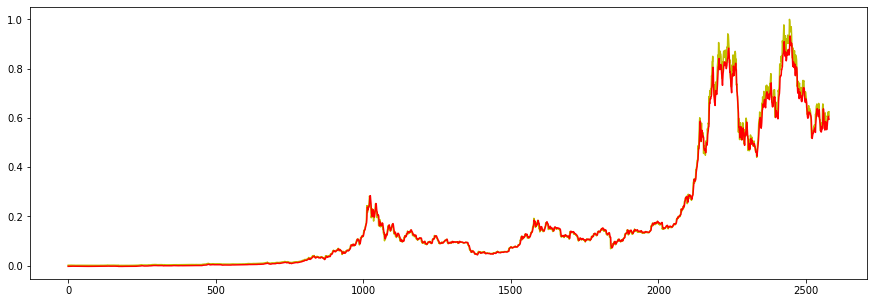

In [90]:
plt.figure(figsize=(15,5))

plt.plot(price[window_size:], color='y')
plt.plot(x_pred[:], color='r')

In [70]:
len(x_train_pred)

2000